**PROJECT: HOSPITAL ADMISSION ANALYSIS**

**PROBLEM STATEMENT:**

A city hospital wants to analyze its admission trends to improve scheduling, reduce waiting times, and
manage resources more effectively. You've been provided with anonymized patient admission data. Your
task is to perform basic exploratory data analysis (EDA) to discover useful patterns.

**IMPORT LIBRARIES**

In [201]:
import pandas as pd
import matplotlib.pyplot as plt

**DATA EXPLORATION**

In [202]:
# LOAD THE DATASET

admissions_df = pd.read_csv('src/admission.csv')
admissions_df.head()

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,4/1/2017,4/3/2017,81,M,R,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
1,2,234696,4/1/2017,4/5/2017,65,M,R,E,Apr-17,5,...,0,0,0,0,0,0,0,0,0,0
2,3,234882,4/1/2017,4/3/2017,53,M,U,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
3,4,234635,4/1/2017,4/8/2017,67,F,U,E,Apr-17,8,...,0,0,0,0,0,0,0,0,0,0
4,5,234486,4/1/2017,4/23/2017,60,F,U,E,Apr-17,23,...,0,0,0,0,0,0,0,0,0,0


In [203]:
# Data Overview

print("DATA OVERVIEW")
print(admissions_df.info())

DATA OVERVIEW
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15757 entries, 0 to 15756
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   SNO                              15757 non-null  int64 
 1   MRD No.                          15757 non-null  object
 2   D.O.A                            15757 non-null  object
 3   D.O.D                            15757 non-null  object
 4   AGE                              15757 non-null  int64 
 5   GENDER                           15757 non-null  object
 6   RURAL                            15757 non-null  object
 7   TYPE OF ADMISSION-EMERGENCY/OPD  15757 non-null  object
 8   month year                       15757 non-null  object
 9   DURATION OF STAY                 15757 non-null  int64 
 10  duration of intensive unit stay  15757 non-null  int64 
 11  OUTCOME                          15757 non-null  object
 12  SMOKING           

**Initial Observations:**

- The dataset contains **56** columns(attributes) and **15,757** entries (representing the no. of patients).
- There are many columns which are not relevant for the questions of our analysis so we need to remove them.
- There are **2** dataTypes object(categorical data), int(numerical/continuous) data.

**DATA PREPROCESSING**

In [204]:
# columns to keep

admissions_df = admissions_df[['MRD No.', 'AGE', 'GENDER', 'TYPE OF ADMISSION-EMERGENCY/OPD', 'D.O.A', 'PRIOR CMP']]
admissions_df.head()

,MRD No.,AGE,GENDER,TYPE OF ADMISSION-EMERGENCY/OPD,D.O.A,PRIOR CMP
0,234735,81,M,E,4/1/2017,0
1,234696,65,M,E,4/1/2017,0
2,234882,53,M,E,4/1/2017,0
3,234635,67,F,E,4/1/2017,0
4,234486,60,F,E,4/1/2017,1


In [205]:
# rename columns 

admissions_df.rename(columns={
    'MRD No.': 'patient_id',
    'AGE': 'age',
    'GENDER': 'gender',
    'TYPE OF ADMISSION-EMERGENCY/OPD': 'admission_type',
    'D.O.A': 'admission_date',
    'PRIOR CMP': 'previous_visits'
}, inplace=True)

admissions_df.head()


,patient_id,age,gender,admission_type,admission_date,previous_visits
0,234735,81,M,E,4/1/2017,0
1,234696,65,M,E,4/1/2017,0
2,234882,53,M,E,4/1/2017,0
3,234635,67,F,E,4/1/2017,0
4,234486,60,F,E,4/1/2017,1


In [206]:
admissions_df.info() # get teh data overview again

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15757 entries, 0 to 15756
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   patient_id       15757 non-null  object
 1   age              15757 non-null  int64 
 2   gender           15757 non-null  object
 3   admission_type   15757 non-null  object
 4   admission_date   15757 non-null  object
 5   previous_visits  15757 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 738.7+ KB


In [207]:
# convert 'admission_date' to datetime

admissions_df['admission_date'] = pd.to_datetime(admissions_df['admission_date'], errors='coerce')

# extract "admission_day" from "admission_date"

admissions_df['admission_day'] = admissions_df['admission_date'].dt.day_name()

admissions_df.head()

,patient_id,age,gender,admission_type,admission_date,previous_visits,admission_day
0,234735,81,M,E,2017-04-01,0,Saturday
1,234696,65,M,E,2017-04-01,0,Saturday
2,234882,53,M,E,2017-04-01,0,Saturday
3,234635,67,F,E,2017-04-01,0,Saturday
4,234486,60,F,E,2017-04-01,1,Saturday


In [208]:
print(admissions_df.info())

# Numeric Data Stats
print("NUMERIC DATA STATS")
print(admissions_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15757 entries, 0 to 15756
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   patient_id       15757 non-null  object        
 1   age              15757 non-null  int64         
 2   gender           15757 non-null  object        
 3   admission_type   15757 non-null  object        
 4   admission_date   10102 non-null  datetime64[ns]
 5   previous_visits  15757 non-null  int64         
 6   admission_day    10102 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 861.8+ KB
None
NUMERIC DATA STATS
                age                 admission_date  previous_visits
count  15757.000000                          10102     15757.000000
mean      61.426160  2018-02-08 14:55:19.897049856         0.154471
min        4.000000            2017-01-04 00:00:00         0.000000
25%       54.000000            2017-08-06 00:00:

- After removing the irrelevant columns and adding new columns we have **7** columns(Attributes) left.
- It contains **15,757** rows/entries(representing no. of patients).
- **3** DataTypes **object, integer, datetime**. This indicates that dataset is mix of continuous/numerical, catgorical and time data.
- The avg. age of patient's is approx. **61.42** years, with min age of 4 years and max of 110 years.
- The mean 61.42 years indicate majority of the patients are older.
- Mostly patients are first time visitors as the mean is low approximately **0.15**.

In [209]:
# Data Cleaning 

# check missing values
print("MISSING VALUES")
missing_entries = admissions_df.isnull().sum()
print(missing_entries)

total_entries = admissions_df.shape[0]
missing_entries_percentage = (missing_entries/total_entries) * 100
print(f"\nMISSING VALUES PERCENTAGE:\n{missing_entries_percentage}")

# check for duplicated values
print("\nDUPLICATED VALUES")
print(admissions_df.duplicated().sum())

MISSING VALUES
patient_id            0
age                   0
gender                0
admission_type        0
admission_date     5655
previous_visits       0
admission_day      5655
dtype: int64

MISSING VALUES PERCENTAGE:
patient_id          0.000000
age                 0.000000
gender              0.000000
admission_type      0.000000
admission_date     35.888811
previous_visits     0.000000
admission_day      35.888811
dtype: float64

DUPLICATED VALUES
1409


- We have **5655** missing values in admission_date and admission_day columns.
- We have **1409** duplicated entries in our dataset.

In [210]:
# Handling Duplicated values

admissions_df = admissions_df.drop_duplicates()
print(admissions_df.duplicated().sum())
print(admissions_df.shape)

0
(14348, 7)


- After removing the duplicated entries **14,347** entries are left.

In [211]:
# Handling Missing values

most_frequent_date = admissions_df['admission_date'].mode()[0]
admissions_df['admission_date'] = admissions_df['admission_date'].fillna(most_frequent_date)

# re extract admission_day from admission_date

admissions_df['admission_day'] = admissions_df['admission_date'].dt.day_name()

# check again for missing values
admissions_df.isnull().sum()

patient_id         0
age                0
gender             0
admission_type     0
admission_date     0
previous_visits    0
admission_day      0
dtype: int64

- Since **35.9%** of the admission dates were missing, dropping them would result in significant data loss, so I imputed them with the most frequent admission date. As it was a suitable approach to preserve the dataset and ensure reliable trend analysis.

**EXPLORATORY DATA ANALYSIS: INSIGHTS INTO PATIENT ADMISSIONS AT THE HOSPITAL**

**1. Total Number of Admissions**

In [212]:
total_admissions = len(admissions_df['patient_id'])
print(f"\nTotal Admissions: {total_admissions}")


Total Admissions: 14348


**2. Distribution of Gender among admitted patients**


Genders Count:
 gender
Male      9095
Female    5253
Name: count, dtype: int64

Gender %:
 gender
Male      63.39
Female    36.61
Name: count, dtype: float64


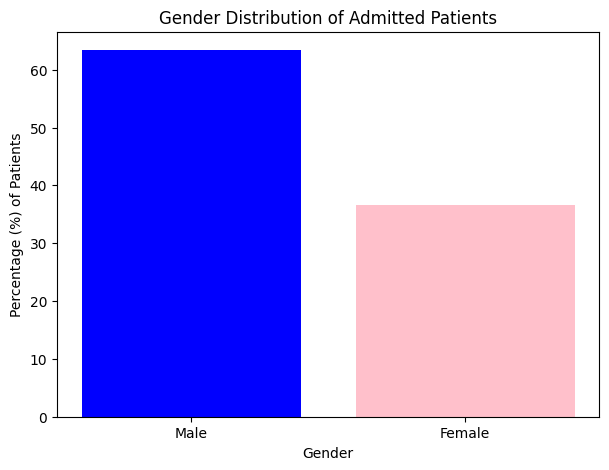

In [213]:
admissions_df["gender"] = admissions_df["gender"].replace({"M": "Male", "F": "Female"})
genders_count = admissions_df['gender'].value_counts()

print(f"\nGenders Count:\n {genders_count}")

gender_percentage = (genders_count/ total_admissions) * 100
print(f"\nGender %:\n {gender_percentage.round(2)}")

fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(gender_percentage.index, gender_percentage.values, color=['blue', 'pink'])
ax.set_title("Gender Distribution of Admitted Patients")
ax.set_xlabel("Gender")
ax.set_ylabel("Percentage (%) of Patients")
plt.show()

- A significantly higher no. of **male patients (63.39%)** were admitted to the hospital compared to female patients (36.61%).

**3. Most Frequently Admitted Age Group**


Most Frequently admitted Age Group: 66+

Age Group Count:
age_group
0-18       52
19-35     483
36-50    1819
51-65    5718
66+      6274
Name: count, dtype: int64


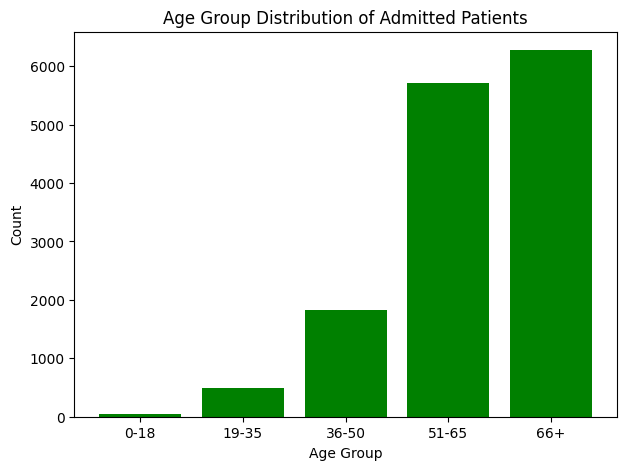

In [214]:
# bucketization
bins = [0, 18, 35, 50, 65, 100]
labels = ['0-18', '19-35', '36-50', '51-65', '66+']
admissions_df["age_group"] = pd.cut(admissions_df['age'], bins=bins, labels=labels, right=False)

most_frequent_age_group = admissions_df['age_group'].mode()[0]
print(f"\nMost Frequently admitted Age Group: {most_frequent_age_group}")

age_group_count = admissions_df['age_group'].value_counts().sort_index()
print(f"\nAge Group Count:\n{age_group_count}")

fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(age_group_count.index, age_group_count.values, color='green')
ax.set_title("Age Group Distribution of Admitted Patients")
ax.set_xlabel("Age Group")
ax.set_ylabel("Count")
plt.show()

- The most frequently admitted Age-group is **66+**, indicating a higher hospitalization rate among elderly patients.

**4. Most Common Admission Types**


Admission Types Count:
admission_type
Emergency    9934
OPD          4414
Name: count, dtype: int64


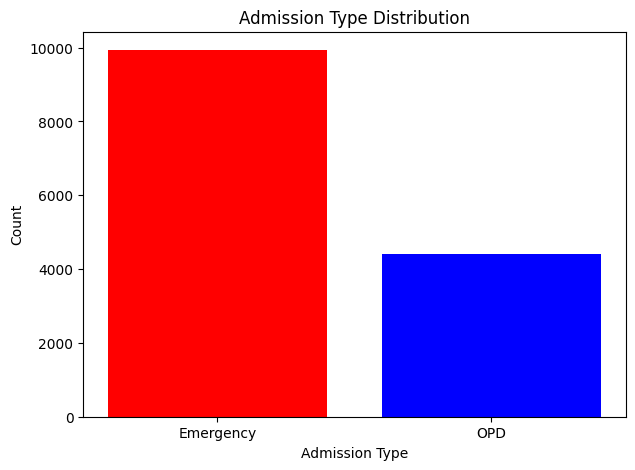

In [215]:
admissions_df["admission_type"] = admissions_df["admission_type"].replace({ "E": "Emergency","O": "OPD"})
admission_types_count = admissions_df['admission_type'].value_counts()

print(f"\nAdmission Types Count:\n{admission_types_count}")

fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(admission_types_count.index, admission_types_count.values, color=["red","blue"])
ax.set_title("Admission Type Distribution")
ax.set_xlabel("Admission Type")
ax.set_ylabel("Count")
plt.show()

- The most common admission type is **Emergency**, with **9934** cases, which is significantly higher than OPD, **4414** cases. Suggesting that hospital deals with more emergency patients compared to OPD.

**5. Day of the Week with Most Patient Admissions**


Admission Day Count:
admission_day
Monday       6272
Tuesday      1491
Wednesday    1304
Thursday     1378
Friday       1373
Saturday     1323
Sunday       1207
Name: count, dtype: int64


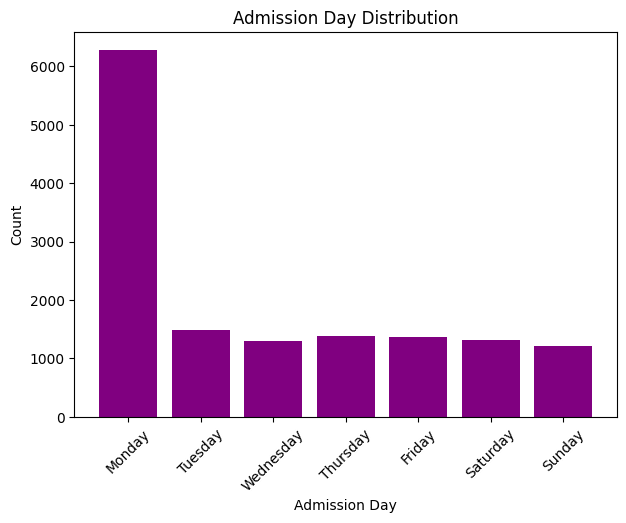

In [216]:
admission_day_count = admissions_df['admission_day'].value_counts()
admission_day_count = admission_day_count.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
print(f"\nAdmission Day Count:\n{admission_day_count}")

fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(admission_day_count.index, admission_day_count.values, color='purple')
ax.set_title("Admission Day Distribution")
ax.set_xlabel("Admission Day")
ax.set_ylabel("Count")
ax.tick_params(axis='x', rotation=45)
plt.show()

- The day with the highest number of patient admissions is **Monday (6272 cases)**. This significantly exceeds the admission counts on other days, indicating a potential trend of increased admissions after the weekend.

**6. Percentage of Patients with Previous Visits**

In [217]:
previous_visited_count = len(admissions_df[admissions_df['previous_visits'] > 0])
print(f"\nNumber of Patients with Previous Visits: {previous_visited_count}")
previous_visited_percentage = (previous_visited_count / total_admissions) * 100
print(f"Percentage of Patients with Previous Visits: {previous_visited_percentage:.2f}%")


Number of Patients with Previous Visits: 2229
Percentage of Patients with Previous Visits: 15.54%


- **15.54%** of patients admitted have visited the hospital before, indicating that a small portion of the hospital's admissions are recurring patients. This suggests that most patients are either first-time visitors or one-time cases

**7. Admission Type Distribution Across Genders**

Admission Types by Gender:
 admission_type  Emergency   OPD
gender                         
Female               3693  1560
Male                 6241  2854


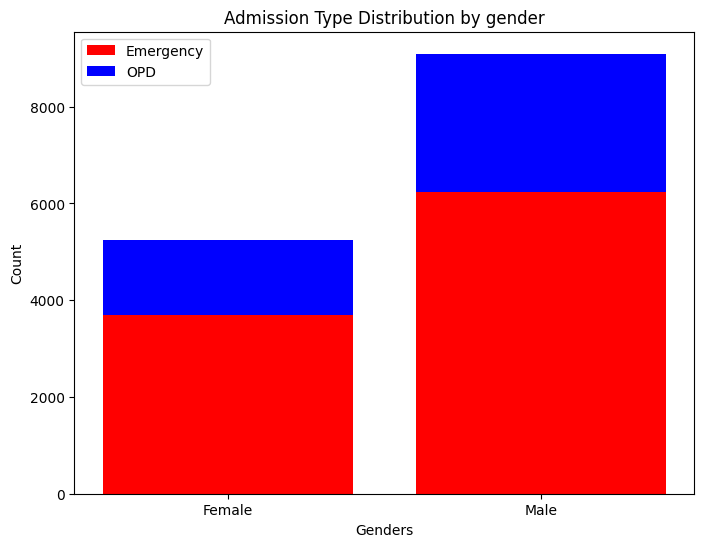

In [218]:
admission_type_by_gender = pd.crosstab(admissions_df['gender'], admissions_df['admission_type'])
print('Admission Types by Gender:\n', admission_type_by_gender)


fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(admission_type_by_gender.index, admission_type_by_gender["Emergency"], color="red", label="Emergency")
ax.bar(admission_type_by_gender.index, admission_type_by_gender["OPD"], bottom=admission_type_by_gender["Emergency"], color="blue", label="OPD")

ax.set_title("Admission Type Distribution by gender")
ax.set_xlabel("Genders")
ax.set_ylabel("Count")
ax.legend()
plt.show()

- From both the stacked bar chart and the contigency/frequency table, we clearly see that more **Male** patients were admitted for both **Emergency** and **OPD** compared to female patients. 
- This indicates possible gender-based differences in healthcare utilization, underlying health conditions, or may reflect the population distribution in the dataset.

**8. Visualizing Interesting Patterns In Data**

**8.1. Trend of Admissions Over Months (Seasonality Analysis)**


Monthly Admissions Count:
admission_month
January      5237
February      424
March         546
April         851
May          1002
June          892
July          995
August        828
September     885
October       828
November     1028
December      832
Name: count, dtype: int64


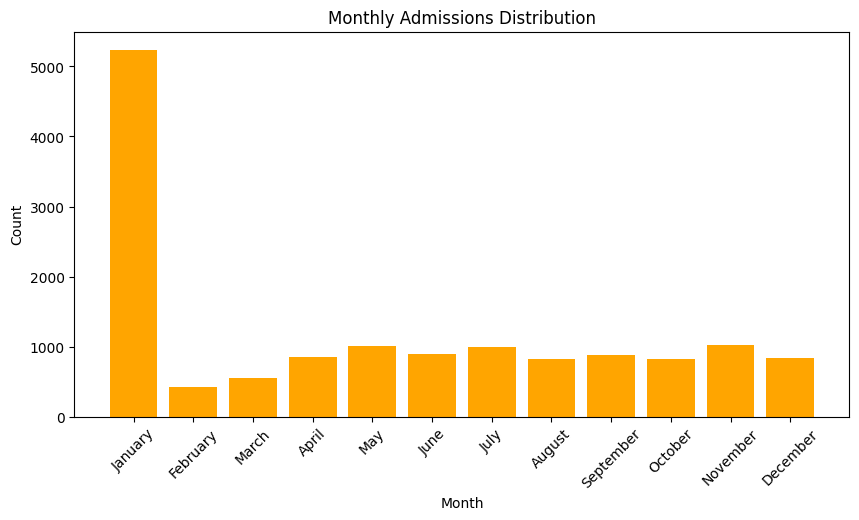

In [219]:
# extract month from admission_date

admissions_df['admission_month'] = admissions_df['admission_date'].dt.month_name()

# count of admissions by month

monthly_admissions_count = admissions_df['admission_month'].value_counts()
monthly_admissions_count = monthly_admissions_count.reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

print(f"\nMonthly Admissions Count:\n{monthly_admissions_count}")

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(monthly_admissions_count.index, monthly_admissions_count.values, color='orange')
ax.set_title("Monthly Admissions Distribution")
ax.set_xlabel("Month")
ax.set_ylabel("Count")
ax.tick_params(axis='x', rotation=45)
plt.show()

- From the visualization, the highest number of hospital admissions occurred in **January (5236)** cases.
- This spike could be due to seasonal health issues in winter, like flu or cold.
- There is also a slight increase in May and November, possibly indicating health changes during seasonal transitions.

**8.2. Emergency Admission Rate by Age Group**


Emergency Admission Rate by Age Group:
age_group
0-18     34.62
19-35    68.12
36-50    64.32
51-65    67.07
66+      73.02
Name: count, dtype: float64


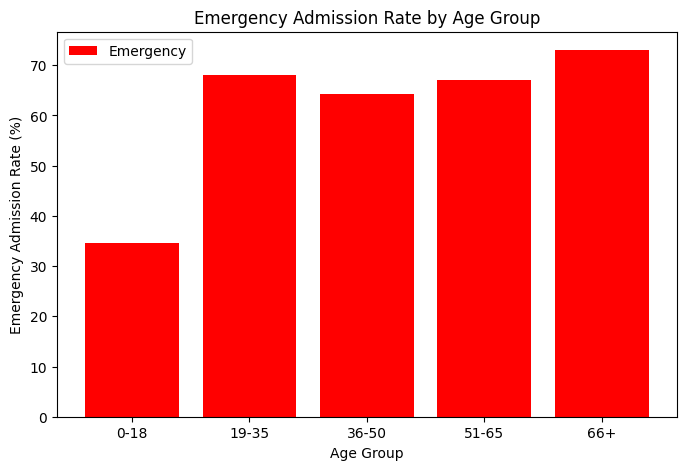

In [220]:
emergency_age_group_count = admissions_df[admissions_df['admission_type'] == 'Emergency']['age_group'].value_counts().sort_index()

emergency_rate = (emergency_age_group_count / age_group_count) * 100

print(f"\nEmergency Admission Rate by Age Group:\n{emergency_rate.round(2)}")

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(emergency_rate.index, emergency_rate.values, color='red', label='Emergency')
ax.set_title("Emergency Admission Rate by Age Group")
ax.set_xlabel("Age Group")
ax.set_ylabel("Emergency Admission Rate (%)")
ax.legend()
plt.show()

- The **66+** age group has the highest emergency admission rate **(73.02%)**, which shows that older people may have more serious health problems.
- The **19–35** group also has a high rate **(68.12%)**, possibly due to accidents or stress-related issues.
- So, both young adults and seniors are visiting in emergencies more than others, but for different reasons.

**8.3. Average Number of Previous Visits by Admission Type**

Avg. Previous Visits per Admission Type:
 admission_type
Emergency    0.18
OPD          0.10
Name: previous_visits, dtype: float64


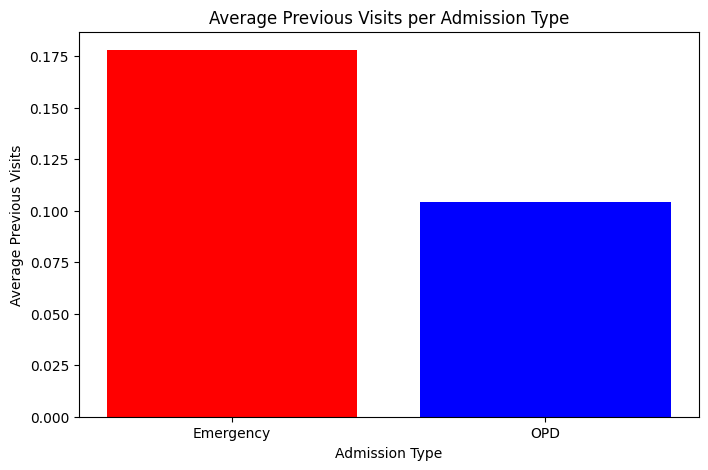

In [221]:
avg_visits_per_admission_type = admissions_df.groupby('admission_type')['previous_visits'].mean()
print(f'Avg. Previous Visits per Admission Type:\n {avg_visits_per_admission_type.round(2)}')

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(avg_visits_per_admission_type.index, avg_visits_per_admission_type.values, color=['red', 'blue'])
ax.set_title("Average Previous Visits per Admission Type")
ax.set_xlabel("Admission Type")
ax.set_ylabel("Average Previous Visits")
plt.show()

- On average, patients admitted through **Emergency** have visited the hospital more times before **(0.18)** than those admitted through OPD (0.10). This means that some emergency patients may have had earlier visits to the hospital possibly because of ongoing or repeated health problems.